In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.inspection import PartialDependenceDisplay

fnames = ['season',
          'yr',
          'mnth',
          'holiday',
          'weekday',
          'workingday',
          'weathersit',
          'temp',
          'atemp',
          'hum',
          'windspeed',
          'casual',
          'registered',
         ]

X = np.load('day_X.npy')
y = np.load('day_y.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

file = open('bike_rentals_rf_np', 'rb')
regr = pickle.load(file)
file.close()

y_test_hat = regr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_hat))

157.5940220620002

2023-02-28 12:13:21,638 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[13/13] features ████████████████████ Time elapsed: 1 seconds

(<Figure size 640x480 with 1 Axes>, <Axes: >)

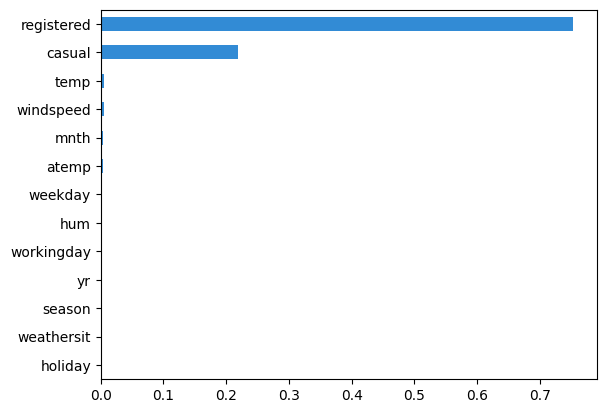

In [2]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

interpreter = Interpretation(X_test, feature_names=fnames)

pyint_model = InMemoryModel(regr.predict, examples=X)
interpreter.feature_importance.plot_feature_importance(pyint_model, ascending=True)